## Dağılım Grafikleri

### Bar Plot (Sütun Grafik)
* Elimizdeki kategorik değişkenleri görselleştirme işleminde bize yardımcı olacaktır.

In [2]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()

In [3]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


#### Veri Setine Hızlı Bakış

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [6]:
df["cut"].value_counts() #kaliteyi ifade eden değerler bastırılır. Aynı zamanda frekanslarını göstermektedir. Kategorik veri olduğu için frekanslarına bakarız.

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [7]:
df["color"].value_counts() #g en kötü j en iyi nominal sınıflandırma.

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

#### Ordinal Veri Tanımlama İşlemi
* Burada da görüldüğü üzere ordered yapıya sahip olan 'cut' verisinin istediğimiz sıra ile sıralanması konusunda bizlere yardımcı olacaktır.

In [7]:
from pandas.api.types import CategoricalDtype

In [8]:
df.cut = df.cut.astype(CategoricalDtype(ordered = True))

In [9]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [10]:
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))

In [11]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

Text(0.5, 1.0, 'Cut Değişkeninin Sınıf Frekansları')

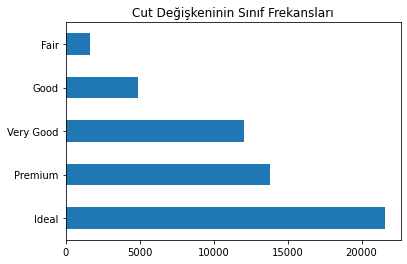

In [12]:
#bar plot oluşturma:
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları")

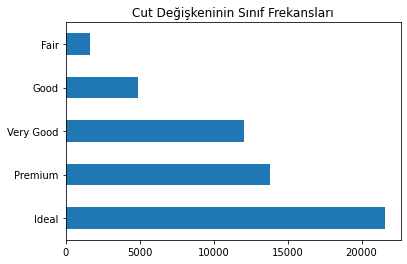

In [13]:
#daha güzel bir görüntü oluşmaması için aşağıdaki gibi değişiklikler yaparız:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));

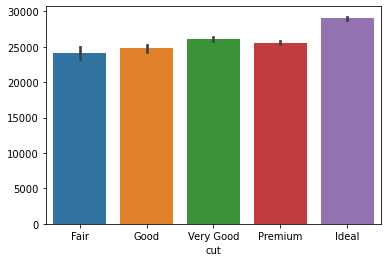

In [14]:
sns.barplot(x = "cut", y = df.cut.index, data = df );

#### Bar Plot Çaprazlamalar
* Veri seti içinde yer alan değişkenlerin birlikte değerlendirilmesi olarak ele alınır.

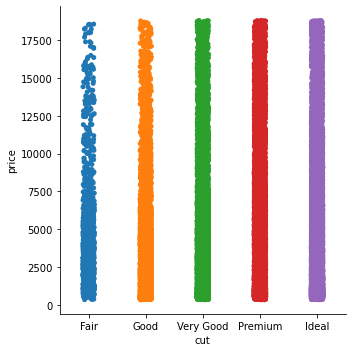

In [16]:
#cut & price çaprazlaması yapılmıştır:
sns.catplot(x = "cut", y = "price", data = df)

**grafik bize ne anlatmaktadır:** kalite arttıkça üst sınıflarda fiyatlarda yoğunlaşmalar gözlemlenmektedir.

<AxesSubplot:xlabel='cut', ylabel='price'>

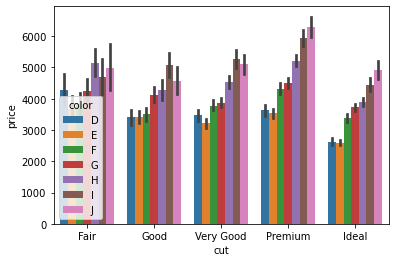

In [17]:
sns.barplot(x = "cut", y = "price", hue = "color", data = df)

kategorik değişkenler **'price'** bazında parçalara ayrılmıştır. **'color'** eklendiğinde **'color'** sınıfları arasındaki ilişki gözlemlenmiştir. 

iki group by işlemi sonucunda; ortalama değerler baz alınmış, küçük çubuklar standart sapmayı göstermiştir.

In [15]:
#dogrulama işlemi:
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

### Histogram Grafiği Oluşturulması

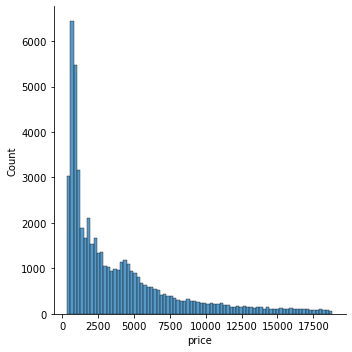

In [19]:
sns.displot(df.price, kde = False) #kde yoğunluk fonksiyonu

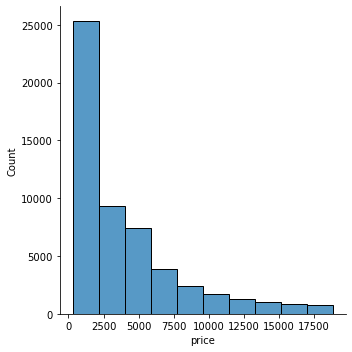

In [20]:
sns.displot(df.price, bins = 10, kde = False) #bins kaç adet kutu olacağını göstermektedir.

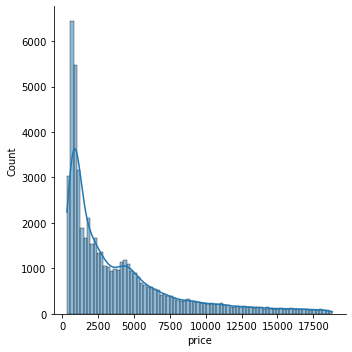

In [16]:
sns.displot(df.price, kde = True) #kde değerini 'true' olarak düzenlersek bize yoğunluğuda gösterecektir.

<AxesSubplot:xlabel='price', ylabel='Density'>

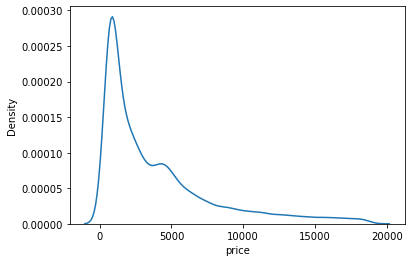

In [22]:
#sadece yogunluk grafiğini görmek istersek:
sns.kdeplot(df.price)

<AxesSubplot:xlabel='price', ylabel='Density'>

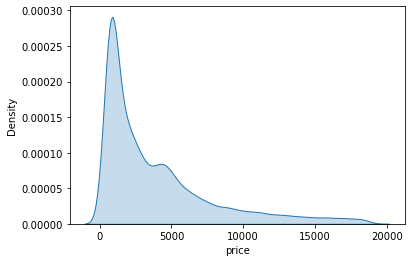

In [17]:
sns.kdeplot(df.price, shade =  True) #yoğunluk grafiğinde içini dolu göstermek istersek 'shade' yapısını 'True' hale dönüştürmemiz gerekmektedir.

In [20]:
#yogunluk grafiği hakkında bilgi edinmemizi, hangi değişkenlere sahip olduğunu görmemizi sağlar.

In [21]:
?sns.kdeplot 

Signature:
sns.kdeplot(
    x=None,
    *,
    y=None,
    shade=None,
    vertical=False,
    kernel=None,
    bw=None,
    gridsize=200,
    cut=3,
    clip=None,
    legend=True,
    cumulative=False,
    shade_lowest=None,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    ax=None,
    weights=None,
    hue=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    multiple='layer',
    common_norm=True,
    common_grid=False,
    levels=10,
    thresh=0.05,
    bw_method='scott',
    bw_adjust=1,
    log_scale=None,
    color=None,
    fill=None,
    data=None,
    data2=None,
    warn_singular=True,
    **kwargs,
)
Docstring:
Plot univariate or bivariate distributions using kernel density estimation.

A kernel density estimate (KDE) plot is a method for visualizing the
distribution of observations in a dataset, analagous to a histogram. KDE
represents the data using a continuous probability density curve in one or
more dimensions.

The approach is explained further 

In [32]:
?sns.displot

Signature:
sns.displot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    row=None,
    col=None,
    weights=None,
    kind='hist',
    rug=False,
    rug_kws=None,
    log_scale=None,
    legend=True,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    col_wrap=None,
    row_order=None,
    col_order=None,
    height=5,
    aspect=1,
    facet_kws=None,
    **kwargs,
)
Docstring:
Figure-level interface for drawing distribution plots onto a FacetGrid.

This function provides access to several approaches for visualizing the
univariate or bivariate distribution of data, including subsets of data
defined by semantic mapping and faceting across multiple subplots. The
``kind`` parameter selects the approach to use:

- :func:`histplot` (with ``kind="hist"``; the default)
- :func:`kdeplot` (with ``kind="kde"``)
- :func:`ecdfplot` (with ``kind="ecdf"``; univariate-only)

Additionally, a :func:`rugplot` can be added to any kind of plot to show
individual 

#### Histogram ve Yoğunluk Çaprazlamalar

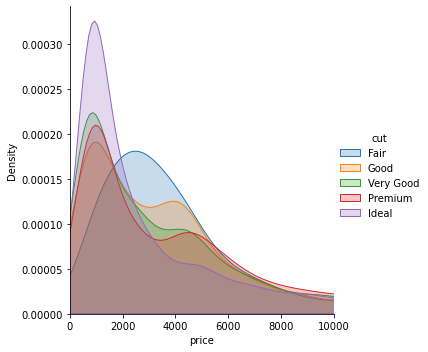

In [22]:
(sns
 .FacetGrid(df,
              hue = "cut",
              height = 5,
              xlim = (0,10000))
 .map(sns.kdeplot, "price", shade = True)
 .add_legend());

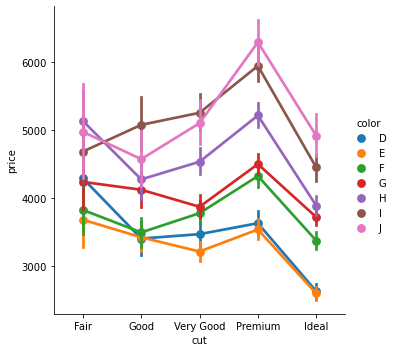

In [48]:
sns.catplot(x ="cut", y = "price", hue = "color", kind = "point", data = df)

### Kutu Grafik (Box Plot)
#### Veri Seti Hikayesi

**total bill:** yemeğin toplam fiyatı (bahşiş ve vergi dahil)

**tip:** bahşiş

**sex:** ücreti ödeyen kişinin cinsiyeti (D=male, 1=female)

**smoker:** grupta sigara içen var mi? (0-No, 1=Yes)

**day:** gün (3-Thur, 4-Fri, 5-Sat, 6-Sun)

**time:** ne zaman? (0-Day, 1=Night)

**size:** grupta kaç kişi var?

In [5]:
import seaborn as sns 
tips = sns.load_dataset("tips")
df = tips.copy()
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [7]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [8]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [9]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [10]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [11]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

<AxesSubplot:xlabel='total_bill'>

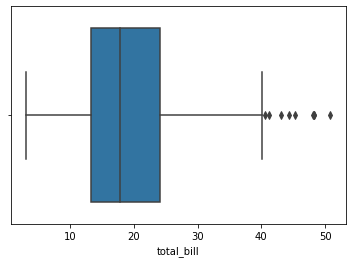

In [12]:
sns.boxplot(x = df["total_bill"])

C:\Users\Hatice.DESKTOP-72EACSO\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='total_bill'>

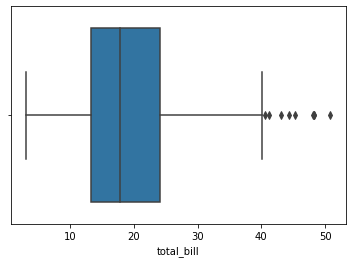

In [14]:
sns.boxplot(x = df["total_bill"], orient = "v") #dik olan box plot nasıl yapılacak bak.

#### Box Plot Çaprazlamalar

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [21]:
# Hangi günler daha fazla kazanıyoruz:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

<AxesSubplot:xlabel='day', ylabel='total_bill'>

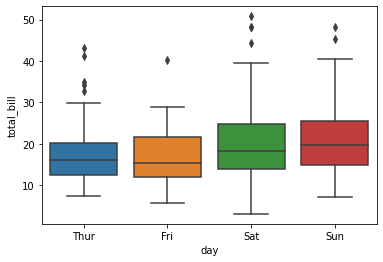

In [22]:
sns.boxplot(x = "day", y = "total_bill", data = df)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

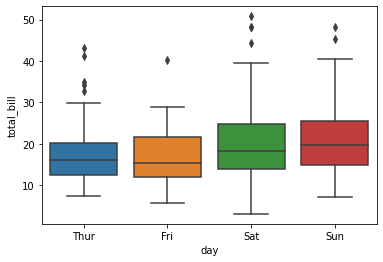

In [25]:
sns.boxplot(x = "day", y = "total_bill", data = df)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

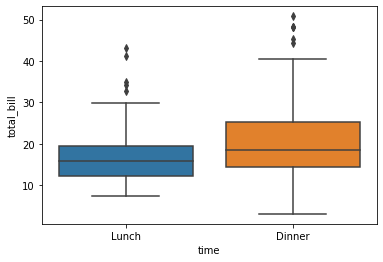

In [26]:
#sabah mı akşam mı daha çok para kazanıyoruz?
sns.boxplot(x = "time", y = "total_bill", data = df)

<AxesSubplot:xlabel='size', ylabel='total_bill'>

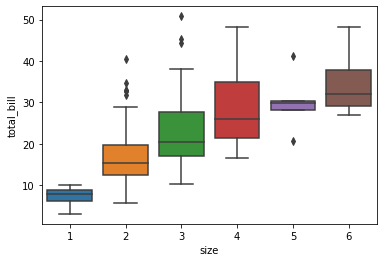

In [27]:
# grup sayısı ve kazanç arasında doğru orantılı mıdıır?
sns.boxplot(x = "size", y = "total_bill", data = df)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

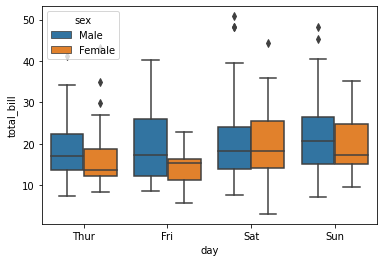

In [29]:
# cinsiyete göre ödeme dağılımları
sns.boxplot(x = "day", y = "total_bill", hue = "sex", data = df)